In [1]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [114]:
#Day 2 
#measured data

#fixed tau 

ftau = 900
vRD = [600000,100000,1100000,1600000,2000000]
int_1_ftau = [1.603e6,1.314e6,1.600e6,1.594e6,1.594e6]
sig_1_ftau = [1.864e3,0.2053e3,4.4003,2.513e3,2.791e3]
int_2_ftau = [1.289e6,1.194e6,1.295e6,1.285e6,1.246e6]
sig_2_ftau = [4.726e3,2.534e3,3.631e3,3.947e3,4.034e3]
int_3_ftau = [3.404e5,6.965e4,5.648e5,7.593e5,8.393e5]
sig_3_ftau = [1.877e3,0.842e3,2.164e3,0.737e3,0.851e3]

fRD = 1600000
vtau = [900,5000,10000,15000,20000]
int_1_fRD = [1.594e6,1.278e6,1.066e6,8.013e5,6.301e5] 
sig_1_fRD = [2.513e3,2.378e3,1.855e3,1.387e3,1.138e3]
int_2_fRD = [1.285e6,4.015e5,8.133e4,3.013e4,3.472e4]
sig_2_fRD = [3.947e3,1.557e3,1.501e3,0.762e3,1.172e3]
int_3_fRD = [7.593e5,6.876e5,6.551e5,6.0845e5,5.732e5]
sig_3_fRD = [0.737e3,0.114e3,1.043e3,0.909e3,0.8247e3]

vRD = np.array(vRD)*1e-6
vtau = np.array(vtau)*1e-6

In [115]:
#theoretical functions

def M1(t,M0,T1):
    return M0*(1-np.exp(-t/T1))


def M2(t,M0,T2):
    return M0*np.exp(-t/T2)

sample 1
M0 =  1597761.34069 +- 2260.27353893
T1 =  0.0578621668203 +- 0.000576707996641
sample 2
M0 =  1278750.00851 +- 11108.3961297
T1 =  0.0368468879115 +- 0.00392789792747
sample 3
M0 =  1349946.40713 +- 112077.237983
T1 =  2.0119832348 +- 0.251738183989


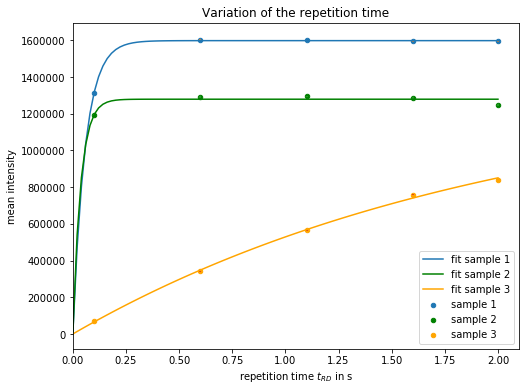

In [125]:
#fitting data fixed tau
fig,ax = plt.subplots(figsize=(8,6))

#sample 1
popt,pcov  = curve_fit(M1,vRD,int_1_ftau,p0=[10000,100])

T1 = popt[1]
T1_err = np.sqrt(np.diag(pcov))[1]
M0 = popt[0]
M0_err = np.sqrt(np.diag(pcov))[0]
print("sample 1")
print("M0 = ",M0,"+-",M0_err)
print("T1 = ",T1,"+-",T1_err)

t = np.linspace(0,2,100)
ax.plot(t,M1(t,*popt),label="fit sample 1")
ax.scatter(vRD,int_1_ftau,s=20,label="sample 1")
ax.errorbar(vRD,int_1_ftau,yerr=sig_1_ftau,ls="")


#sample 2
popt,pcov  = curve_fit(M1,vRD,int_2_ftau,p0=[10000,100])

T1 = popt[1]
T1_err = np.sqrt(np.diag(pcov))[1]
M0 = popt[0]
M0_err = np.sqrt(np.diag(pcov))[0]
print("sample 2")
print("M0 = ",M0,"+-",M0_err)
print("T1 = ",T1,"+-",T1_err)

t = np.linspace(0,2,100)
ax.plot(t,M1(t,*popt),label="fit sample 2",c="g")
ax.scatter(vRD,int_2_ftau,s=20,label="sample 2",c="g")
ax.errorbar(vRD,int_2_ftau,yerr=sig_2_ftau,ls="")



#sample 3
popt,pcov  = curve_fit(M1,vRD,int_3_ftau,p0=[10000,100])

T1 = popt[1]
T1_err = np.sqrt(np.diag(pcov))[1]
M0 = popt[0]
M0_err = np.sqrt(np.diag(pcov))[0]
print("sample 3")
print("M0 = ",M0,"+-",M0_err)
print("T1 = ",T1,"+-",T1_err)

t = np.linspace(0,2,100)
ax.plot(t,M1(t,*popt),label="fit sample 3",c="orange")
ax.scatter(vRD,int_3_ftau,s=20,label="sample 3",c="orange")
ax.errorbar(vRD,int_3_ftau,yerr=sig_3_ftau,ls="")
 

ax.set_xlim([0,2.1])
ax.set_xlabel("repetition time $t_{RD}$ in s")
ax.set_ylabel("mean intensity")
ax.set_title("Variation of the repetition time")

ax.legend(loc="best")
fig.savefig("rep_time.pdf")

sample 1
M0 =  1657322.52164 +- 26862.1589444
T2 =  0.0209617949941 +- 0.000835528086219
sample 2
M0 =  1663171.47595 +- 33325.4391691
T2 =  0.00349368646097 +- 0.000131240586253
sample 3
M0 =  756458.596855 +- 10560.5739656
T2 =  0.0696340924969 +- 0.00609692171544


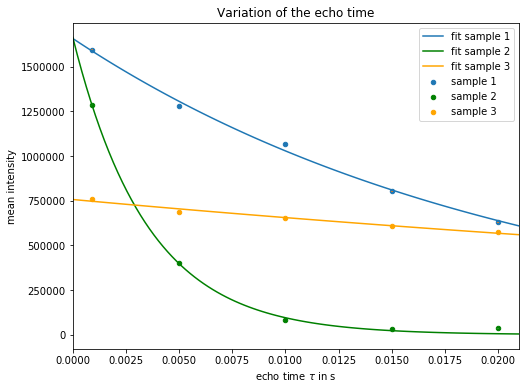

In [124]:
#fitting data fixed RD
fig,ax = plt.subplots(figsize=(8,6))

#sample 1
popt,pcov  = curve_fit(M2,vtau,int_1_fRD,p0=[100000,1e-4])

T2 = popt[1]
T2_err = np.sqrt(np.diag(pcov))[1]
M0 = popt[0]
M0_err = np.sqrt(np.diag(pcov))[0]
print("sample 1")
print("M0 = ",M0,"+-",M0_err)
print("T2 = ",T2,"+-",T2_err)

t = np.linspace(0,0.021,100)
ax.plot(t,M2(t,*popt),label="fit sample 1")
ax.scatter(vtau,int_1_fRD,s=20,label="sample 1")
ax.errorbar(vtau,int_1_fRD,yerr=sig_1_ftau,ls="")


#sample 2
popt,pcov  = curve_fit(M2,vtau,int_2_fRD,p0=[100000,1e-4])

T2 = popt[1]
T2_err = np.sqrt(np.diag(pcov))[1]
M0 = popt[0]
M0_err = np.sqrt(np.diag(pcov))[0]
print("sample 2")
print("M0 = ",M0,"+-",M0_err)
print("T2 = ",T2,"+-",T2_err)

t = np.linspace(0,0.021,100)
ax.plot(t,M2(t,*popt),label="fit sample 2",c="g")
ax.scatter(vtau,int_2_fRD,s=20,label="sample 2",c="g")
ax.errorbar(vtau,int_2_fRD,yerr=sig_2_fRD,ls="")



#sample 3
popt,pcov  = curve_fit(M2,vtau,int_3_fRD,p0=[100000,1e-4])

T2 = popt[1]
T2_err = np.sqrt(np.diag(pcov))[1]
M0 = popt[0]
M0_err = np.sqrt(np.diag(pcov))[0]
print("sample 3")
print("M0 = ",M0,"+-",M0_err)
print("T2 = ",T2,"+-",T2_err)

t = np.linspace(0,0.021,100)
ax.plot(t,M2(t,*popt),label="fit sample 3",c="orange")
ax.scatter(vtau,int_3_fRD,s=20,label="sample 3",c="orange")
ax.errorbar(vtau,int_3_fRD,yerr=sig_3_fRD,ls="")
 

ax.set_xlim([0,0.021])
ax.set_xlabel(r"echo time $ \tau $ in s")
ax.set_ylabel("mean intensity")
ax.set_title("Variation of the echo time")

ax.legend(loc="best")
fig.savefig("echo_time.pdf")